In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(schema[schema.Column == 'EducationImportant']['Question'])

['Overall, how important has your formal schooling and education been to your career success?']

In [5]:
df["EducationImportant"].head()

0                   NaN
1                   NaN
2    Not very important
3                   NaN
4                   NaN
Name: EducationImportant, dtype: object

In [6]:
edu_imp = df["EducationImportant"].value_counts().reset_index()              # List of different answers provided
edu_imp.head()

,index,EducationImportant
0,Somewhat important,6289
1,Important,5861
2,Not very important,4795
3,Very important,3716
4,Not at all important,2694


In [7]:
edu_imp.rename(columns={'index': 'How Much Important', 'EducationImportant': 'count'}, inplace=True)
edu_imp.head()

,How Much Important,count
0,Somewhat important,6289
1,Important,5861
2,Not very important,4795
3,Very important,3716
4,Not at all important,2694


In [8]:
edu_imp["Percentage"] = edu_imp["count"]/np.sum(edu_imp["count"])          # We might also look at the percent
edu_imp

,How Much Important,count,Percentage
0,Somewhat important,6289,0.269279
1,Important,5861,0.250953
2,Not very important,4795,0.205309
3,Very important,3716,0.159109
4,Not at all important,2694,0.115350


In [9]:
edu_imp.set_index("How Much Important" , inplace = True)            # Setting the index as "How Much Important"
edu_imp

,count,Percentage
How Much Important,,
Somewhat important,6289,0.269279
Important,5861,0.250953
Not very important,4795,0.205309
Very important,3716,0.159109
Not at all important,2694,0.115350


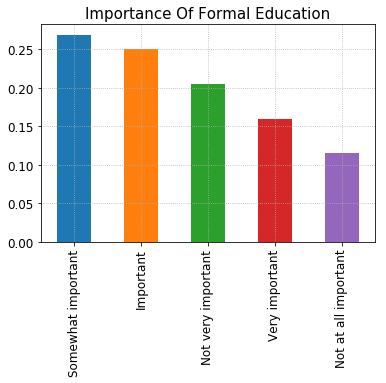

In [10]:
(edu_imp["Percentage"]).plot(kind = "bar",fontsize = 12)           # Plotting bar graph to visualize the findings
plt.title("Importance Of Formal Education", fontsize = 15)
plt.xlabel("")
plt.grid(linestyle = ":")
plt.show()

In [11]:
list(schema[schema.Column == 'EducationTypes']['Question'])

['Outside of your formal schooling and education, which of the following have you done?']

In [12]:
df["EducationTypes"].head()

0             Online course; Open source contributions
1    Online course; Self-taught; Hackathon; Open so...
2    Self-taught; Coding competition; Hackathon; Op...
3                                                  NaN
4                                                  NaN
Name: EducationTypes, dtype: object

In [13]:
edu_types = df['EducationTypes'].value_counts().reset_index()
edu_types.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [14]:
edu_types.rename(columns={'index': 'method', 'EducationTypes': 'count'}, inplace=True)
edu_types.head()

,method,count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [15]:
major_values = ["Self-taught","Online course","On-the-job training","Open source contributions"," Hackathon","Coding competition",
                "Part-time/evening course","Industry certification","Bootcamp"]     # List of different answers(only major ones) provided

In [16]:
def total_count(df, col1, col2, look_for):                # Now we want to see how often each of these individual values appears 
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [17]:
edu_types_df = total_count(edu_types, 'method', 'count', major_values)
edu_types_df.head()

,method,count
0,Self-taught,27330
1,Online course,13792
2,On-the-job training,12508
3,Open source contributions,11225
4,Hackathon,7020


In [18]:
edu_types_df["Percentage"] = edu_types_df["count"]/np.sum(edu_types_df["count"])  # We may look at the percentage for better look
edu_types_df.head()

,method,count,Percentage
0,Self-taught,27330,0.302286
1,Online course,13792,0.152548
2,On-the-job training,12508,0.138346
3,Open source contributions,11225,0.124155
4,Hackathon,7020,0.077645


In [19]:
edu_types_df.set_index("method", inplace = True)
edu_types_df.head()

,count,Percentage
method,,
Self-taught,27330,0.302286
Online course,13792,0.152548
On-the-job training,12508,0.138346
Open source contributions,11225,0.124155
Hackathon,7020,0.077645


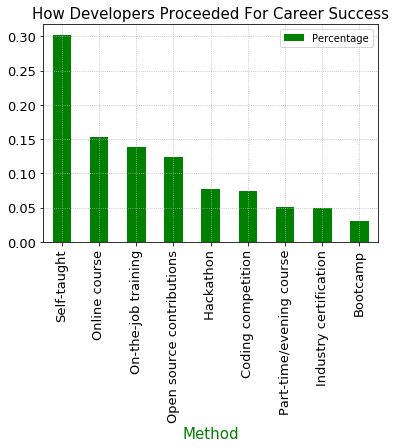

In [20]:
(edu_types_df["Percentage"]).plot(kind = "bar" , color = "green" , fontsize = 13)
plt.title("How Developers Proceeded For Career Success" , fontsize = 15)
plt.xlabel("Method", color = "green" , fontsize = 15)
plt.legend(loc = "upper right")
plt.grid(linestyle = ":")
plt.show()

In [21]:
list(schema[schema.Column == 'SelfTaughtTypes']['Question'])

["You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."]

In [22]:
df["SelfTaughtTypes"].shape

(51392,)

In [23]:
self_edu = df["SelfTaughtTypes"].value_counts().reset_index()
self_edu.rename(columns={'index': 'method', 'SelfTaughtTypes': 'count'}, inplace=True)
self_edu.head()

,method,count
0,Official documentation; Trade book; Stack Over...,1001
1,Official documentation; Stack Overflow Q&A,956
2,Official documentation; Stack Overflow Q&A; No...,848
3,Official documentation; Stack Overflow Q&A; Bu...,796
4,Official documentation; Trade book; Stack Over...,781


In [24]:
major_values_1 = ["Official documentation","Trade book"," Stack Overflow Q&A","Textbook","Stack Overflow Docs",
                 "Non-Stack online communities"," Built-in help"]        # List of different answers(only major ones) provided

In [25]:
# Using the function "total_count" to see how often each of these individual values appears

self_edu_df = total_count(self_edu, 'method', 'count', major_values_1)      
self_edu_df.head()

,method,count
0,Official documentation,21434
2,Stack Overflow Q&A,19986
1,Trade book,14389
5,Non-Stack online communities,13546
6,Built-in help,12541


In [26]:
self_edu_df["Percentage"] = self_edu_df["count"]/np.sum(self_edu_df["count"])*100         # We might also look at the percent
self_edu_df.head()

,method,count,Percentage
0,Official documentation,21434,22.609228
2,Stack Overflow Q&A,19986,21.081834
1,Trade book,14389,15.177950
5,Non-Stack online communities,13546,14.288728
6,Built-in help,12541,13.228624


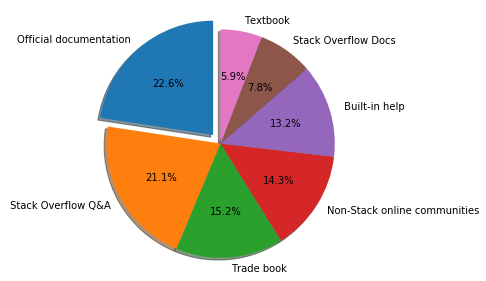

In [27]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise

explode = (0.1, 0, 0, 0,0,0,0)                             # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(self_edu_df["Percentage"],explode = explode,labels = self_edu_df["method"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')                                 # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()